In [1]:
import numpy as np
import pandas as pd 
import math 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [2]:
df = pd.read_csv("C:/KMUTNB/Project_own/python/Project/house price prediction/California Housing Prices.csv",index_col=False)
df.sample(10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
20537,-121.73,38.54,18.0,974.0,317.0,521.0,317.0,1.0633,137500.0,INLAND
18007,-121.96,37.29,24.0,1240.0,263.0,690.0,276.0,5.0000,283000.0,<1H OCEAN
6460,-118.05,34.10,36.0,1606.0,318.0,889.0,294.0,4.7931,272600.0,INLAND
15381,-117.19,33.41,16.0,3031.0,554.0,1301.0,518.0,4.0882,296100.0,<1H OCEAN
13454,-117.40,34.11,14.0,1933.0,347.0,1443.0,376.0,4.2121,128100.0,INLAND
11540,-118.00,33.74,25.0,2767.0,346.0,1148.0,372.0,6.3940,316700.0,<1H OCEAN
19414,-121.06,37.73,5.0,2256.0,420.0,1246.0,397.0,4.9236,155900.0,INLAND
878,-122.02,37.55,33.0,1325.0,274.0,909.0,267.0,4.5687,177200.0,NEAR BAY
2805,-119.05,35.44,5.0,2133.0,487.0,1182.0,438.0,3.0268,77000.0,INLAND
18749,-122.28,40.50,21.0,2405.0,476.0,1197.0,412.0,2.6488,83100.0,INLAND


In [3]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB
None


In [4]:
# Check data missing 
missing_data = df.isnull().sum()
df.dropna(inplace=True)
print(missing_data)
print(df.info())

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
Int64Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)


In [5]:
df.head(10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR BAY
6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,NEAR BAY
7,-122.25,37.84,52.0,3104.0,687.0,1157.0,647.0,3.1200,241400.0,NEAR BAY
8,-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0,NEAR BAY
9,-122.25,37.84,52.0,3549.0,707.0,1551.0,714.0,3.6912,261100.0,NEAR BAY


# ========== EDA (Exploration Data Analysis) ========== #

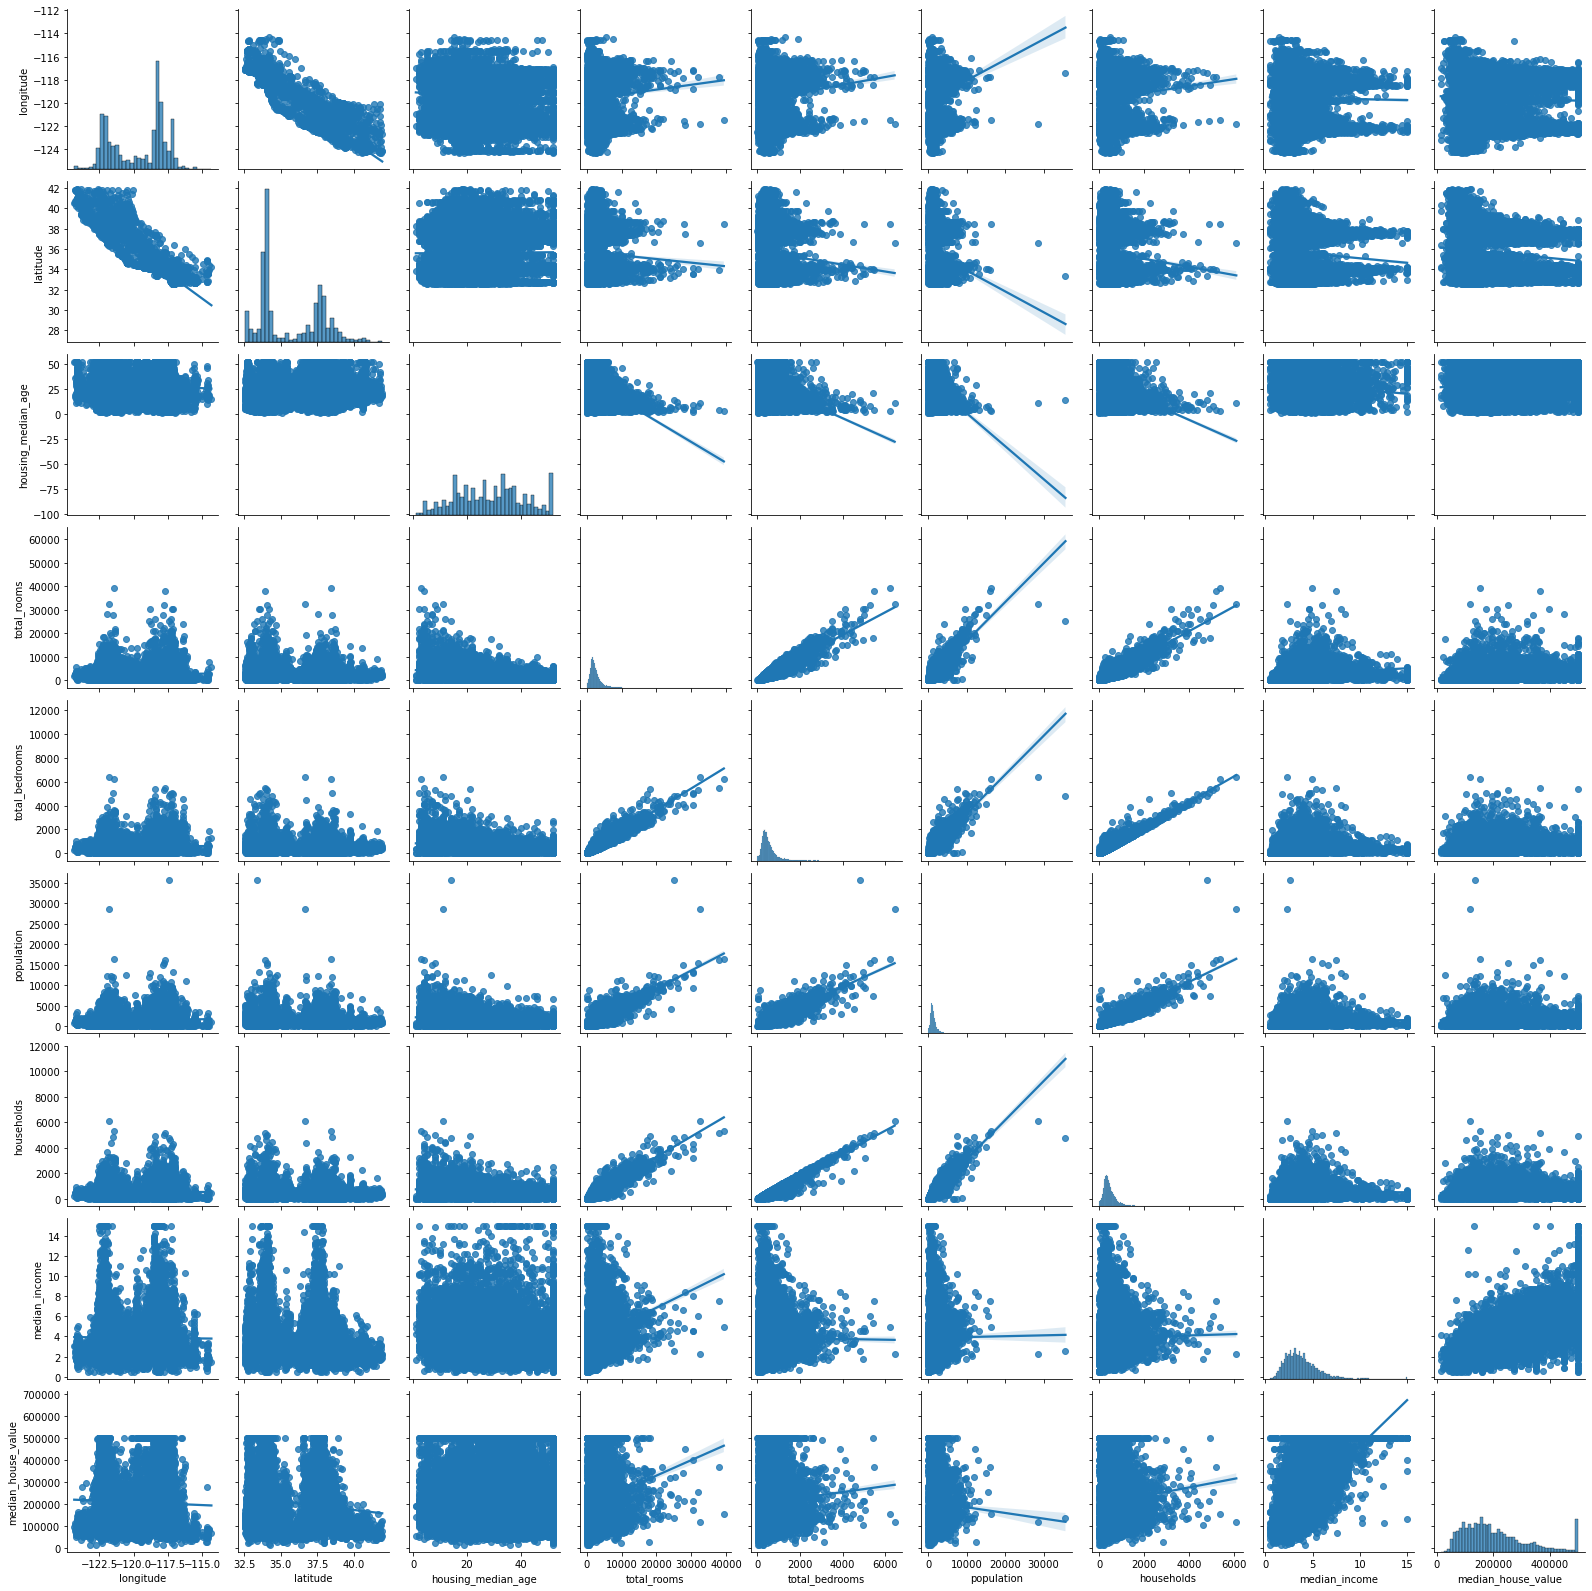

In [6]:
# Pairplot
sns.pairplot(df,kind="reg")

array([[<AxesSubplot:title={'center':'longitude'}>,
        <AxesSubplot:title={'center':'latitude'}>,
        <AxesSubplot:title={'center':'housing_median_age'}>],
       [<AxesSubplot:title={'center':'total_rooms'}>,
        <AxesSubplot:title={'center':'total_bedrooms'}>,
        <AxesSubplot:title={'center':'population'}>],
       [<AxesSubplot:title={'center':'households'}>,
        <AxesSubplot:title={'center':'median_income'}>,
        <AxesSubplot:title={'center':'median_house_value'}>]],
      dtype=object)

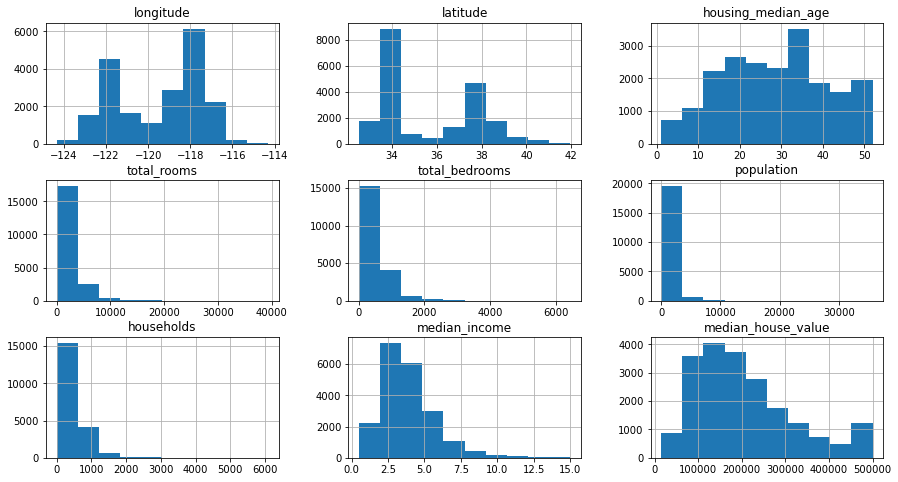

In [7]:
# Explore distribution of numeriacal feature 
df.hist(figsize=(15,8))

In [8]:
# See correlation of each feature 
corr_feature = df.corr()
corr_feature


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924616,-0.109357,0.045480,0.069608,0.100270,0.056513,-0.015550,-0.045398
latitude,-0.924616,1.000000,0.011899,-0.036667,-0.066983,-0.108997,-0.071774,-0.079626,-0.144638
housing_median_age,-0.109357,0.011899,1.000000,-0.360628,-0.320451,-0.295787,-0.302768,-0.118278,0.106432
total_rooms,0.045480,-0.036667,-0.360628,1.000000,0.930380,0.857281,0.918992,0.197882,0.133294
total_bedrooms,0.069608,-0.066983,-0.320451,0.930380,1.000000,0.877747,0.979728,-0.007723,0.049686
population,0.100270,-0.108997,-0.295787,0.857281,0.877747,1.000000,0.907186,0.005087,-0.025300
households,0.056513,-0.071774,-0.302768,0.918992,0.979728,0.907186,1.000000,0.013434,0.064894
median_income,-0.015550,-0.079626,-0.118278,0.197882,-0.007723,0.005087,0.013434,1.000000,0.688355
median_house_value,-0.045398,-0.144638,0.106432,0.133294,0.049686,-0.025300,0.064894,0.688355,1.000000


<AxesSubplot:>

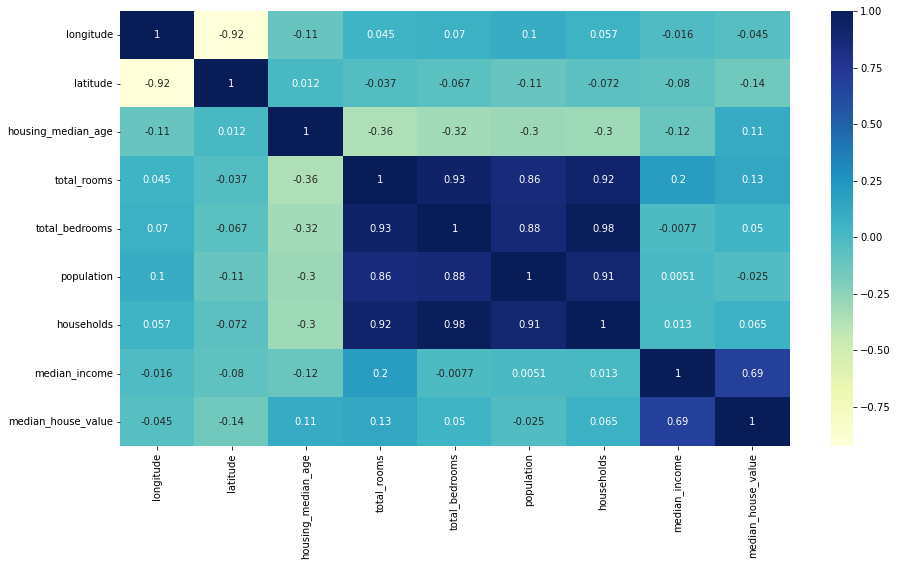

In [9]:
# Use heatmap combine with correlation matrix to analyze easily
plt.figure(figsize=(15,8))
sns.heatmap(corr_feature,annot=True,cmap="YlGnBu")

# ========== Data Preprocessing ========== #

In [10]:
df.head(10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR BAY
6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,NEAR BAY
7,-122.25,37.84,52.0,3104.0,687.0,1157.0,647.0,3.1200,241400.0,NEAR BAY
8,-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0,NEAR BAY
9,-122.25,37.84,52.0,3549.0,707.0,1551.0,714.0,3.6912,261100.0,NEAR BAY


In [11]:
# Due to the scale is too large, need to reduce scale to see easily 
# np.log increase speed and easily to cal 
df["total_rooms"] = np.log(df["total_rooms"]+1)
df["total_bedrooms"] = np.log(df["total_bedrooms"]+1)
df["population"] = np.log(df["population"]+1)
df["households"] = np.log(df["households"]+1)
df.head(10)



,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,6.781058,4.867534,5.777652,4.844187,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,8.867850,7.009409,7.784057,7.037906,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,7.291656,5.252273,6.208590,5.181784,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,7.150701,5.463832,6.326149,5.393628,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,7.395108,5.638355,6.338594,5.560682,3.8462,342200.0,NEAR BAY
5,-122.25,37.85,52.0,6.824374,5.365976,6.025866,5.267858,4.0368,269700.0,NEAR BAY
6,-122.25,37.84,52.0,7.838343,6.194405,6.998510,6.244167,3.6591,299200.0,NEAR BAY
7,-122.25,37.84,52.0,8.040769,6.533789,7.054450,6.473891,3.1200,241400.0,NEAR BAY
8,-122.26,37.84,42.0,7.846199,6.501290,7.095893,6.390241,2.0804,226700.0,NEAR BAY
9,-122.25,37.84,52.0,8.174703,6.562444,7.347300,6.572283,3.6912,261100.0,NEAR BAY


array([[<AxesSubplot:title={'center':'longitude'}>,
        <AxesSubplot:title={'center':'latitude'}>,
        <AxesSubplot:title={'center':'housing_median_age'}>],
       [<AxesSubplot:title={'center':'total_rooms'}>,
        <AxesSubplot:title={'center':'total_bedrooms'}>,
        <AxesSubplot:title={'center':'population'}>],
       [<AxesSubplot:title={'center':'households'}>,
        <AxesSubplot:title={'center':'median_income'}>,
        <AxesSubplot:title={'center':'median_house_value'}>]],
      dtype=object)

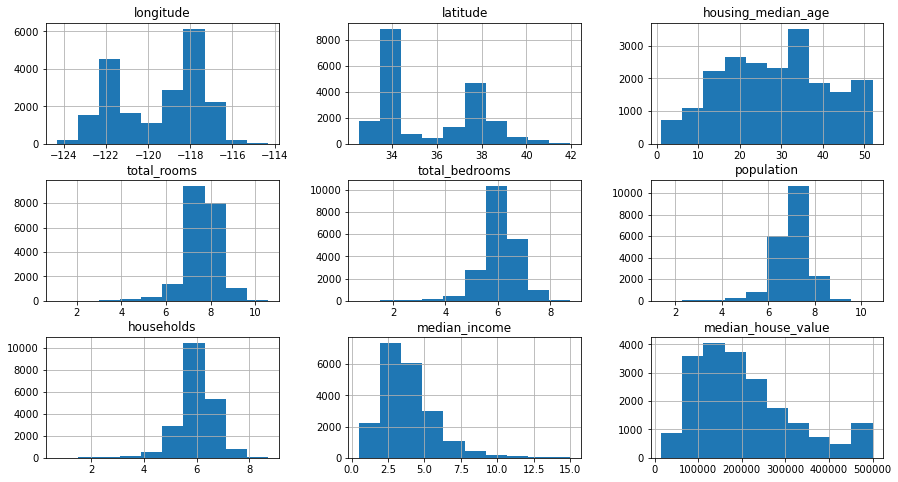

In [12]:
# see distribution like gassian bell curve
df.hist(figsize=(15,8))

In [13]:
# According to my common sense, the col "ocean_proximity" might increase the house price 
# When ur colser to the coast, ur going to have higher prices because that's more desirable 

# Need to turn it to numerical value which represent as category

df["ocean_proximity"].value_counts()


<1H OCEAN     9034
INLAND        6496
NEAR OCEAN    2628
NEAR BAY      2270
ISLAND           5
Name: ocean_proximity, dtype: int64

# ========== Feature Engineering ========== # 

In [14]:
# pd.get_dummies is popular one to encoding from string tp catagorical value.
# auto create dummies
dummies_ocean = pd.get_dummies(df["ocean_proximity"])
dummies_ocean

,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,0,0,0,1,0
1,0,0,0,1,0
2,0,0,0,1,0
3,0,0,0,1,0
4,0,0,0,1,0
...,...,...,...,...,...
20635,0,1,0,0,0
20636,0,1,0,0,0
20637,0,1,0,0,0
20638,0,1,0,0,0


In [15]:
# Join ocean dumies with the dataframe and drop ocean proximity
df = df.join(dummies_ocean).drop(["ocean_proximity"],axis=1)
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,-122.23,37.88,41.0,6.781058,4.867534,5.777652,4.844187,8.3252,452600.0,0,0,0,1,0
1,-122.22,37.86,21.0,8.867850,7.009409,7.784057,7.037906,8.3014,358500.0,0,0,0,1,0
2,-122.24,37.85,52.0,7.291656,5.252273,6.208590,5.181784,7.2574,352100.0,0,0,0,1,0
3,-122.25,37.85,52.0,7.150701,5.463832,6.326149,5.393628,5.6431,341300.0,0,0,0,1,0
4,-122.25,37.85,52.0,7.395108,5.638355,6.338594,5.560682,3.8462,342200.0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,7.418181,5.926926,6.740519,5.802118,1.5603,78100.0,0,1,0,0,0
20636,-121.21,39.49,18.0,6.548219,5.017280,5.877736,4.744932,2.5568,77100.0,0,1,0,0,0
20637,-121.22,39.43,17.0,7.720905,6.186209,6.915723,6.073045,1.7000,92300.0,0,1,0,0,0
20638,-121.32,39.43,18.0,7.528869,6.016157,6.609349,5.857933,1.8672,84700.0,0,1,0,0,0


<AxesSubplot:>

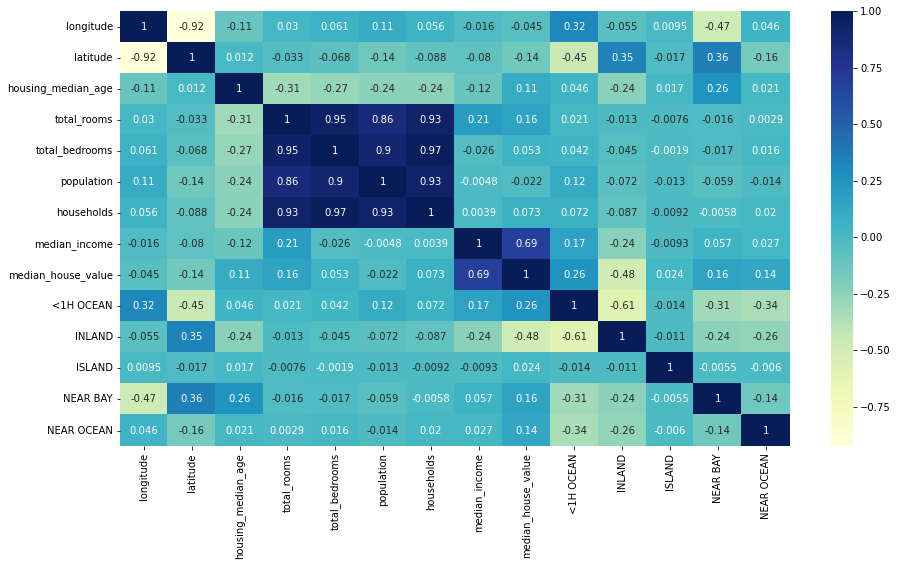

In [16]:
# plot heatmap again to see correlation of new feature 
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(),annot=True,cmap="YlGnBu")

<AxesSubplot:xlabel='latitude', ylabel='longitude'>

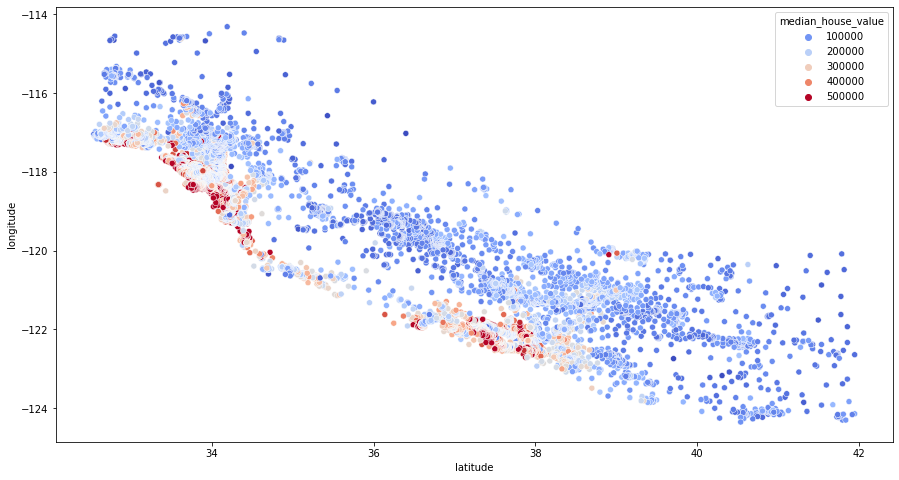

In [17]:
# plt graph to see silimar map by using latitude and longtitude 

plt.figure(figsize=(15,8))
sns.scatterplot(x="latitude",y="longitude",data=df,hue="median_house_value",palette="coolwarm")

# the more red it gets, the more higher house prices

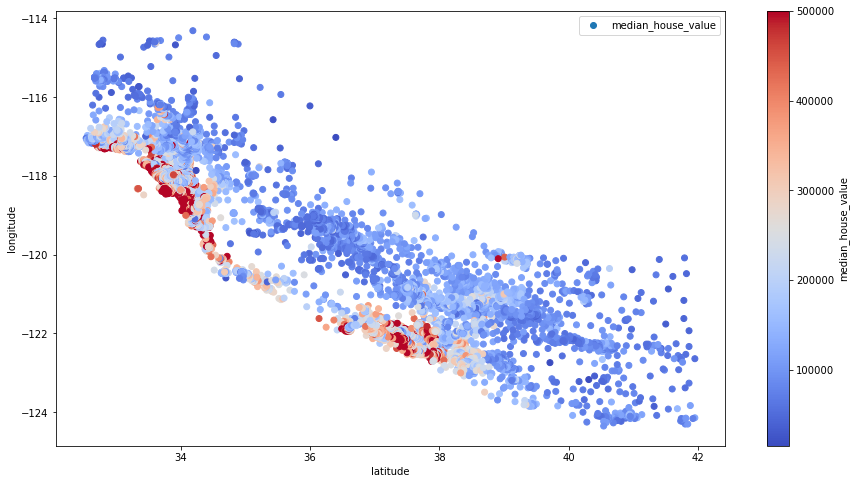

In [18]:
# matplotlib

plt.figure(figsize=(15,8))
scatter = plt.scatter(df["latitude"],df["longitude"],c=df["median_house_value"],cmap ="coolwarm",label="median_house_value") # c=median house values as the color data.
plt.colorbar(scatter,label="median_house_value") # adds a colorbar to the plot based on the values in the median_house_value column.
plt.xlabel("latitude"),plt.ylabel("longitude")
plt.legend()
plt.show()

In [19]:
# add more feature by find ratio 
# df[""]

# =========== Train and Test Model ========== # 

In [20]:
df.head(10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,-122.23,37.88,41.0,6.781058,4.867534,5.777652,4.844187,8.3252,452600.0,0,0,0,1,0
1,-122.22,37.86,21.0,8.867850,7.009409,7.784057,7.037906,8.3014,358500.0,0,0,0,1,0
2,-122.24,37.85,52.0,7.291656,5.252273,6.208590,5.181784,7.2574,352100.0,0,0,0,1,0
3,-122.25,37.85,52.0,7.150701,5.463832,6.326149,5.393628,5.6431,341300.0,0,0,0,1,0
4,-122.25,37.85,52.0,7.395108,5.638355,6.338594,5.560682,3.8462,342200.0,0,0,0,1,0
5,-122.25,37.85,52.0,6.824374,5.365976,6.025866,5.267858,4.0368,269700.0,0,0,0,1,0
6,-122.25,37.84,52.0,7.838343,6.194405,6.998510,6.244167,3.6591,299200.0,0,0,0,1,0
7,-122.25,37.84,52.0,8.040769,6.533789,7.054450,6.473891,3.1200,241400.0,0,0,0,1,0
8,-122.26,37.84,42.0,7.846199,6.501290,7.095893,6.390241,2.0804,226700.0,0,0,0,1,0
9,-122.25,37.84,52.0,8.174703,6.562444,7.347300,6.572283,3.6912,261100.0,0,0,0,1,0


In [21]:
# Prepare data 
X = df.drop(["median_house_value"],axis=1)
y = df["median_house_value"]
X

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,-122.23,37.88,41.0,6.781058,4.867534,5.777652,4.844187,8.3252,0,0,0,1,0
1,-122.22,37.86,21.0,8.867850,7.009409,7.784057,7.037906,8.3014,0,0,0,1,0
2,-122.24,37.85,52.0,7.291656,5.252273,6.208590,5.181784,7.2574,0,0,0,1,0
3,-122.25,37.85,52.0,7.150701,5.463832,6.326149,5.393628,5.6431,0,0,0,1,0
4,-122.25,37.85,52.0,7.395108,5.638355,6.338594,5.560682,3.8462,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,7.418181,5.926926,6.740519,5.802118,1.5603,0,1,0,0,0
20636,-121.21,39.49,18.0,6.548219,5.017280,5.877736,4.744932,2.5568,0,1,0,0,0
20637,-121.22,39.43,17.0,7.720905,6.186209,6.915723,6.073045,1.7000,0,1,0,0,0
20638,-121.32,39.43,18.0,7.528869,6.016157,6.609349,5.857933,1.8672,0,1,0,0,0


In [22]:
# Prepare data 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42,shuffle=True)

X_train_s = StandardScaler().fit_transform(X_train)
X_test_s = StandardScaler().fit_transform(X_test)

print(X_train.shape,X_test.shape)
X_train_s


(14303, 13) (6130, 13)


array([[-0.68684567,  0.92079826, -0.44520313, ..., -0.01182583,
        -0.35702009, -0.38351632],
       [ 0.68114892, -0.77889909,  0.42830842, ..., -0.01182583,
        -0.35702009, -0.38351632],
       [-1.1761284 ,  0.76628032, -0.12756257, ..., -0.01182583,
        -0.35702009, -0.38351632],
       ...,
       [ 0.5812953 , -0.76485201,  1.06358955, ..., -0.01182583,
        -0.35702009, -0.38351632],
       [-1.22605521,  0.90206881, -1.31871469, ..., -0.01182583,
         2.80096282, -0.38351632],
       [-1.42076977,  0.9769866 ,  1.85769097, ..., -0.01182583,
         2.80096282, -0.38351632]])

In [23]:
# Regression model 
from sklearn.linear_model import LinearRegression

model_reg = LinearRegression()

model_reg.fit(X_train,y_train)

LinearRegression()

In [24]:
# Evaluate model
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
pred_reg = model_reg.predict(X_test)
acc_reg = model_reg.score(X_test,y_test)
acc_regR2 = r2_score(y_test,pred_reg)
mse_reg = mean_squared_error(y_test,pred_reg)
rmse_reg = math.sqrt(mse_reg)
print(f"Accuracy Regression: {acc_reg}")
print(f"Accuracy(R2 score) Regression: {acc_regR2}")
print("MSE Regression: {:.4e}".format(mse_reg))
print("RMSE Regression: {:.4e}".format(rmse_reg))

Accuracy Regression: 0.6744021559730808
Accuracy(R2 score) Regression: 0.6744021559730808
MSE Regression: 4.3405e+09
RMSE Regression: 6.5883e+04


In [25]:
# Randomforest model 
from sklearn.ensemble import RandomForestRegressor

model_forest = RandomForestRegressor()

model_forest.fit(X_train,y_train)


RandomForestRegressor()

In [26]:
# Evaluate RandomForest model 
pred_forest = model_forest.predict(X_test)
acc_forest = model_forest.score(X_test,y_test)
acc_forestR2 = r2_score(y_test,pred_forest)
mse_forest = mean_squared_error(y_test,pred_forest)
rmse_forest = math.sqrt(mse_forest)
print(f"Accuracy RandomForest: {acc_forest}")
print(f"Accuracy(R2 score) RandomForest: {acc_forestR2}")
print("MSE RandomForest: {:.4e}".format(mse_forest))
print("RMSE RandomForest: {:.4e}".format(rmse_forest))

Accuracy RandomForest: 0.8222885504956233
Accuracy(R2 score) RandomForest: 0.8222885504956233
MSE RandomForest: 2.3691e+09
RMSE RandomForest: 4.8673e+04


In [27]:
# SVR model 
from sklearn.svm import SVR

model_svr = SVR(kernel="rbf")

model_svr.fit(X_train,y_train)



SVR()

In [28]:
# Evalute SVR model 
pred_svr = model_svr.predict(X_test)
acc_svr = model_svr.score(X_test,y_test)
acc_svrR2 = r2_score(y_test,pred_svr)

mse_svr  = mean_squared_error(y_test,pred_svr)
rmse_svr = math.sqrt(mse_svr)

print(f"Accuracy SVR: {acc_svr}")
print(f"Accuracy SVR(R2 Score): {acc_svrR2}")
print("MSE SVR : {:.4e}".format(mse_svr))
print("RMSE SVR : {:.4e}".format(rmse_svr))

Accuracy SVR: -0.046678625149712216
Accuracy SVR(R2 Score): -0.046678625149712216
MSE SVR : 1.3953e+10
RMSE SVR : 1.1812e+05
